**Rasa is Opensource Machine Learning framework used for developing AI based chatbot.**


In [1]:
!pip install rasa==1.10.3

     |████████████████████████████████| 510 kB 9.7 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 3.0 MB 49.9 MB/s 
     |████████████████████████████████| 3.2 MB 65.0 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 448 kB 50.9 MB/s 
     |████████████████████████████████| 149 kB 60.8 MB/s 
     |████████████████████████████████| 72 kB 606 kB/s 
     |████████████████████████████████| 174 kB 63.3 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
     |████████████████████████████████| 417 kB 55.2 MB/s 
     |████████████████████████████████| 979 kB 31.7 MB/s 
     |████████████████████████████████| 132 kB 56.5 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
     |████████████████████████████████| 422.0 MB 30 kB/s 
     |███████████████████████

**Little Changes in Installtion**
1. upgrade table from 3.7.0 to 3.6.1
2. upgrade ipython to avoid crashing colab session, while doing restart the runtime.

After, installing ipython you saw a "RESTART RUNTIME" button in "ipython" cell output. 

Click on it to restart the runtime and you are good to go. 

No need to update anything else, all run as usual.


In [2]:
!pip install -U tables==3.6.1

     |████████████████████████████████| 4.3 MB 6.7 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0


In [3]:
!pip install -U ipython

     |████████████████████████████████| 792 kB 7.7 MB/s 
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 2.0.10 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.1 which is incompatible.


**Click on above "RESTART RUNTIME" button**

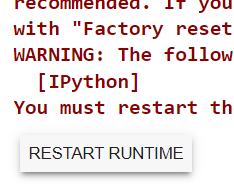

In [1]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 8.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.4
    Uninstalling nest-asyncio-1.5.4:
      Successfully uninstalled nest-asyncio-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.10 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [3]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [4]:
from rasa.cli.scaffold import create_initial_project

In [5]:
project = "test-project"
create_initial_project(project)

In [6]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['domain.yml', '__init__.py', 'data', 'tests', 'credentials.yml', '__pycache__', 'actions.py', 'endpoints.yml', 'config.yml']


In [7]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


### Sometime it may not run on first go. So, try to execute below line 3 time and it work fine. It is bug in rasa.

In [8]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 74.06it/s, # actions=16]
Processed actions: 16it [00:00, 643.16it/s, # examples=16]
Epochs: 100%|██████████| 100/100 [00:14<00:00,  6.85it/s, t_loss=0.083, loss=0.012, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs: 100%|██████████| 100/100 [00:15<00:00,  6.28it/s, t_loss=1.531, i_loss=0.144, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20220218-134251.tar.gz'.
models/20220218-134251.tar.gz


In [9]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hey
Hey! How are you?
great
Great, carry on!
/stop


In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
i am fine
Great, carry on!
am i talking to human
I am a bot, powered by Rasa.
/stop


In [10]:
%%writefile data/nlu.md


## intent:check_in
- What are your check-in timings?
- check-in timings of your hotel is?
- can you tell me the check-in timing of your hotel?
- Is there any check-in timing of hotel?

## intent:check_out
- What are your check-out timings?
- check-out timings of your hotel is?
- can you tell me the check-out timing of your hotel?
- Is there any check-out timing of hotel?

## intent:cancel_resr
- How do I cancel a reservation?
- Procedure of cancel a hotel?
- Please cancel my reservation.
- Can You please cancel my reservation?

## intent:can_policy
- What is your cancellation policy?
- can you tell me about the cancellation policy of your hotel?
- cancellation policy of your hotel?
- Is there any cancellation plicy of your hotel?
- cancellation Policy of your hotel?

## intent:restaurant
- Does the hotel have a restaurant?
- Is there any restaurant in hotel?
- Any facilities of restaurant in hotel?
- any restaurant in hotel?
- did any restaurant in hotel?

## intent:breakfast
- Does the hotel offer breakfast?
- Any idea about breakfast offer by hotel?
- any complementary breakfast offer by hotel?
- Breakfast offer by hotel?
- breakfast provided by hote?

## intent:break_time
- What are the breakfast timings?
- Is there any breakfast timing?
- can you tell me the breakfast timing of hotel?
- breakfast timing?
- what is the breakfast timing of the hotel?

## intent:rest_time
- What are the timings of your restaurant?
- Is there any timing of your restaurant?
- timing of your restaurant?
- can you tell me the restaurant timing of your hotel?

## intent:clean_now
- can you send someone right now for cleaning.
- send someone right now
- right now please
- i prefer right now
- please clean my room rightnow.

## intent:clean
- i want to clean my room
- can you send somebody to clean my room
- can you send room service to clean my room
- clean my room please
- send someone to clean my room.

## intent:deluxe
- i need deluxe room
- i want deluxe room
- deluxe rooms
- can i get the deluxe rooms
- i am looking for deluxe rooms

## intent:simple
- i need simple room
- i want simple room
- simple room
- i am looking for simple room
- can i get the simple rooms

## intent:num_room
- I need [2](number) rooms
- is [3](number) room available
- [4](number) rooms
- can i get the [3](number) rooms
- I want [3](number) rooms.

## intent:book_room
- i want to book a room
- i need a room
- i am looking for a room
- is room empty
- book a room for a night.

## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:goodbye
- bye
- goodbye
- see you around
- see you later

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good

## intent:mood_unhappy
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not very good
- extremely sad
- so sad

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?


Overwriting data/nlu.md


In [11]:
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - mood_great
  - mood_unhappy
  - bot_challenge
  - book_room
  - num_room
  - simple
  - deluxe
  - clean
  - clean_now
  - check_in
  - check_out
  - cancel_resr
  - can_policy
  - restaurant
  - breakfast
  - break_time
  - rest_time

responses:

  utter_can_policy:
  - text: "The booking deposit is refundable if the cancellation occurs at least 15 days before arrival.For cancellations made after this limit, a penalty will be imposed based on the cancellation policy."

  utter_restaurant:
  - text: "Yes, the hotel has a restaurant called the Zephyr Bar. With our menu we strive to reflect the historic art and the spirit of our neighborhood by offering a glimpse into what makes our area unique."
  
  utter_breakfast:
  - text: "The hotel provides its guests with a free made-to-order breakfast each morning."

  utter_break_time:
  - text: "Monday through Friday breakfast is 6 am to 9 am. On Saturday and Sunday, we are open from 7 am to 10:30 am."
  
  utter_rest_time:
  - text: "Our restaurant serves a dazzling 24-hour menu."

  utter_check_in:
  - text: "Check-in time starts at 4 PM. Minimum check-in age is 21.Please contact the reception for early check-in requests."

  utter_check_out:
  - text: "Check-out time is 11 AM. Please contact the reception for late checkout requests."
  
  utter_cancel_resr:
  - text: "To cancel a reservation, select the “Reservations” link from the homepage."

  utter_clean_now:
  - text:"sure, I will send someone to your room right now."

  utter_clean:
  - text:"When should i arrange for the cleaing?"

  utter_deluxe:
  - text:" You have choosen to book a Deluxe rooms"

  utter_simple:
  - text: "You have choosen to book a sample rooms."

  utter_num_room:
  - text: "what type of room would you want to book - simple room or Deluxe room ?"

  utter_book_room:
  - text: "How many room would you like to book?"

  utter_greet:
  - text: "Hey! How may i help you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great, carry on!"

  utter_goodbye:
  - text: "Bye"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

entities:
  - number

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true


Overwriting domain.yml


In [12]:
%%writefile data/stories.md

## check in
* greet
  - utter_greet
* check_in
  - utter_check_in

## check out
* greet
  - utter_greet
* check_out
  - utter_check_out

## cancel reservation
* greet
  - utter_greet
* cancel_resr
  - utter_cancel_resr

## policy
* greet
  - utter_greet
* can_policy
  - utter_can_policy

## Restaurant details
* greet
  - utter_greet
* restaurant
  - utter_restaurant

## break fast
* greet
  - utter_greet
* breakfast
  - utter_breakfast

## break time
* greet
  - utter_greet
* break_time
  - utter_break_time

## rest time
* greet
  - utter_greet
* rest_time
  - utter_rest_time

## clean_room
* greet
  - utter_greet
* clean
  - utter_clean
* clean_now
  - utter_clean_now

## book_simple_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* simple 
  - utter_simple

## book_deluxe_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* deluxe
  - utter_deluxe

## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy

## sad path 1
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* deny
  - utter_goodbye

## say goodbye
* goodbye
  - utter_goodbye

## bot challenge
* bot_challenge
  - utter_iamabot


Overwriting data/stories.md


In [13]:
model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean_now' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_deluxe' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
Processed Story Blocks:   0%|          | 0/16 [00:00<?, ?it/s, # 

Training Core model...


Processed trackers: 100%|██████████| 16/16 [00:00<00:00, 116.44it/s, # actions=44]
Processed actions: 44it [00:00, 616.75it/s, # examples=44]
Epochs: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s, t_loss=0.130, loss=0.021, acc=1.000]


Core model training completed.
Training NLU model...


Epochs: 100%|██████████| 100/100 [00:43<00:00,  2.29it/s, t_loss=2.936, i_loss=1.245, entity_loss=0.009, i_acc=0.936, entity_f1=0.860]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20220218-152531.tar.gz'.
models/20220218-152531.tar.gz


In [14]:
from rasa.jupyter import chat
endpoints = "endpoints.yml"
chat(model_path, endpoints)

Instructions for updating:
Use tf.identity instead.
Your bot is ready to talk! Type your messages here or send '/stop'.
hey
Hey! How may i help you?
i need room
How many room would you like to book?
5 rooms
what type of room would you want to book - simple room or Deluxe room ?
i need simple rooms
You have choosen to book a sample rooms.
/stop


In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hey
Hey! How may i help you?
i want to know the cancelation policy
The booking deposit is refundable if the cancellation occurs at least 15 days before arrival.For cancellations made after this limit, a penalty will be imposed based on the cancellation policy.
/stop


In [15]:
import rasa.data as data

stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)

print(stories_directory, nlu_data_directory)

/tmp/tmpuexlkmhr /tmp/tmps5hy4s8c


100%|██████████| 109/109 [00:01<00:00, 100.70it/s]


Done testing...


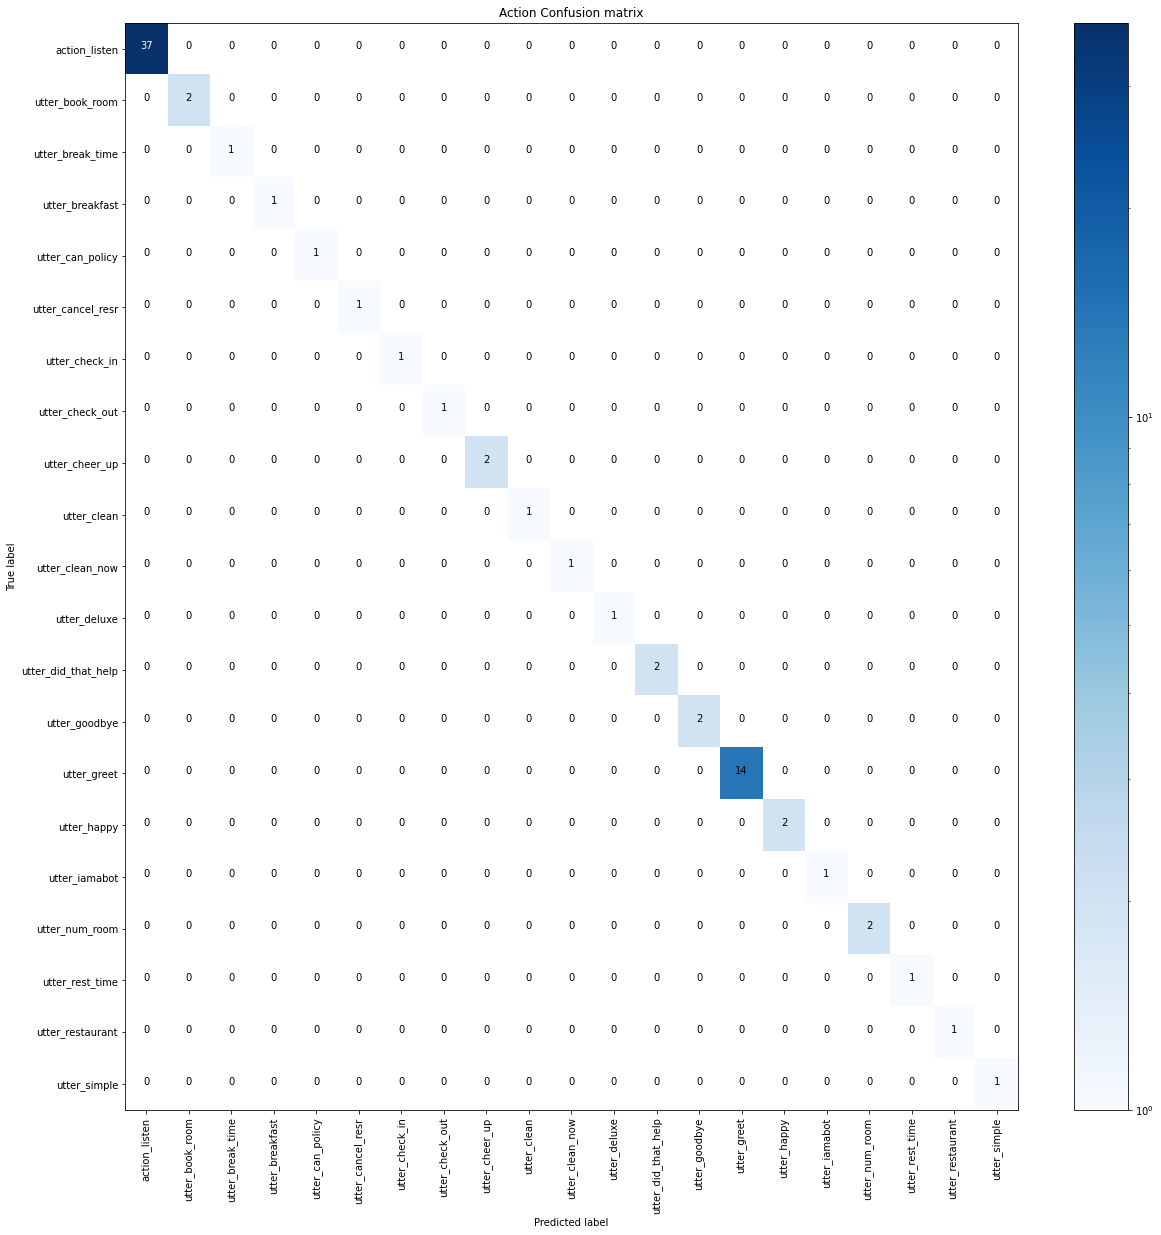

In [16]:
rasa.test(model_path, stories_directory, nlu_data_directory)

print("Done testing...")